# Getting data from the cloud

One of the major use-cases for cloud is large-scale computing. Another one is straight-forward data-sharing. And naturally, the combination of these things. Let's consider why that is. One the growing concerns with data sharing is that for different users of the data to gain access to the (ever-larger) datasets that are available through "brain observatories", multiple copies of the data would have to be generated. This is costly, in the best case, and prohibitive, in the worst case. The mantra you will hear about this issue is that as the data grows larger, you will have to "bring the compute to the data"

What does this mean in practice? Using cloud computing as the basis for data sharing means that the data does not have to be copied out of the the cloud at any point during data analysis. In many cases, analysis of large-scale datasets intends to distill a large data-set into a set of conclusions. This usually means that the ultimate outputs of analysis can be very small relative to the data inputs (while acknowledging that there might be intermediate steps where data grows larger...). For example, a figure or a few numbers. If computation can be done to minimize transffer of very large datasets, this could 




## Amazon's Simple Storage Services and open datasets 

In practice, Amazon Web Services (AWS) has taken the lead in providing open access to neuroscience datasets, through its [open data program](https://registry.opendata.aws/). 

Some of the interesting datasets provided through this program: 

- [International Neuroimaging Data-Sharing Initiative (INDI)](https://registry.opendata.aws/fcp-indi/)
- [OpenNeuro](https://registry.opendata.aws/openneuro/)
- [Open NeuroData](https://registry.opendata.aws/open-neurodata/)
- [Allen Brain Observatory](https://registry.opendata.aws/allen-brain-observatory/)
- [Human Connectome Project](https://registry.opendata.aws/hcp-openaccess/)
- [NYU Langone & FAIR FastMRI Dataset](https://registry.opendata.aws/nyu-fastmri/)

Most of these datasets provide access to a lot of data without requiring any data use agreement, or any form of authentication. Anyone can download the data. An important exception is the Human Connectome Project. Access to this dataset requires acquiring and using a special set of credentials. To get these credentials, you will need to register at https://db.humanconnectome.org/, follow the instruction therein and agree to the terms and conditions of use (these are fairly straightforward). Once you have agreed, you can receive AWS credentials. AWS credentials are composed of two keys: an access key id and a secret access key. In general, you want to be very careful with your AWS credentials. These can typically be used to do whatever you can do on AWS. The HCP credentials can be used only to access the data that is publicly provided. Still, please keep those private -- they do provide access to the data.

That all said, we'll use another dataset as an example here. If you are interested in learning more about the HCP data, you should look into Noah Benson's resource showcase video on thie topic (available in the parietal library). 

Here, let's consider some data stored in OpenNeuro. OpenNeuro is the BRAIN Initiative's archive for human neuroimaging data. But it goes well beyond that. It currently provides ready access to more than 400 datasets, with a variety of human neuroimaging data-types and experiments. Let's start poking around.

We will use the S3FS (S3 file system) library as the tool to access the data

In [1]:
import s3fs

The main object used in this library is a file-system object. The idea is that this object abstracts away the true complexity of the cloud computing system and lets us pretend that S3 is a file-system and that we can do file-system operations on it:

In [6]:
fs = s3fs.S3FileSystem(anon=True)

For example, we can read a list of the files in an S3 bucket using the `ls` method:

In [7]:
ll = fs.ls('/openneuro.org/')

This is the top-level directory of the bucket. It contains a folder for each dataset. 

In [8]:
len(ll)

599

This is a bit cumbersome to look at, so let's take a look at just the first few items:

In [9]:
ll[:10]

['openneuro.org/ds000001',
 'openneuro.org/ds000002',
 'openneuro.org/ds000003',
 'openneuro.org/ds000005',
 'openneuro.org/ds000006',
 'openneuro.org/ds000007',
 'openneuro.org/ds000008',
 'openneuro.org/ds000009',
 'openneuro.org/ds000011',
 'openneuro.org/ds000017']

We see that each folder is named after a dataset. Let's look into one of these datasets:

In [10]:
fs.ls('openneuro.org/ds002596')

['openneuro.org/ds002596/.datalad',
 'openneuro.org/ds002596/.gitattributes',
 'openneuro.org/ds002596/CHANGES',
 'openneuro.org/ds002596/README',
 'openneuro.org/ds002596/annex-uuid',
 'openneuro.org/ds002596/dataset_description.json',
 'openneuro.org/ds002596/sub-01',
 'openneuro.org/ds002596/sub-02',
 'openneuro.org/ds002596/sub-03',
 'openneuro.org/ds002596/sub-04',
 'openneuro.org/ds002596/sub-05',
 'openneuro.org/ds002596/sub-06',
 'openneuro.org/ds002596/sub-07',
 'openneuro.org/ds002596/sub-08',
 'openneuro.org/ds002596/sub-09',
 'openneuro.org/ds002596/sub-10',
 'openneuro.org/ds002596/sub-11',
 'openneuro.org/ds002596/sub-12',
 'openneuro.org/ds002596/sub-13',
 'openneuro.org/ds002596/sub-14',
 'openneuro.org/ds002596/sub-15',
 'openneuro.org/ds002596/sub-16',
 'openneuro.org/ds002596/sub-17',
 'openneuro.org/ds002596/sub-18',
 'openneuro.org/ds002596/sub-19',
 'openneuro.org/ds002596/task-d1_bold.json',
 'openneuro.org/ds002596/task-d2_bold.json']

This looks like a BIDS dataset (spoiler alert: all datasets in OpenNeuro are BIDS datasets).

Let's use our file-system to look into the README file. The file-system has an `open` method that can be used in a Python context manager to do operations that you can normally do on open files. For example, you can read the contents of the file, convert them into a string and print them:

In [11]:
with fs.open('openneuro.org/ds002596/README') as f:
    read = f.read()
    as_string = str(read.decode())  # Read as bytes, so needs to be decoded first
    print(as_string)

OpenNeuro curator note: This dataset was previously accessible at ds002036. The dataset was reuploaded due to privacy considerations. 


We can also browse the https://openneuro.org website, if we'd like to get more information about this dataset, or if we would like to search for other datasets with particular characteristics. 

The `ls` command allows us to explore deeper into the file tree:

In [12]:
fs.ls('openneuro.org/ds002596/sub-01/')

['openneuro.org/ds002596/sub-01/anat', 'openneuro.org/ds002596/sub-01/func']

In [13]:
fs.ls('openneuro.org/ds002596/sub-01/anat')

['openneuro.org/ds002596/sub-01/anat/sub-01_T1w.json',
 'openneuro.org/ds002596/sub-01/anat/sub-01_T1w.nii.gz']

We saw that we can use a context manager to read data. Another way to gain access to the data inside one of these files is the `get` method, which would make a local copy of the file:

In [14]:
fs.get('openneuro.org/ds002596/sub-01/anat/sub-01_T1w.nii.gz', './sub-01_T1w.nii.gz')

[None]

In [15]:
ls

notes.md  reading-data-from-the-cloud.ipynb  sub-01_T1w.nii.gz


We can then use nibabel to read the data from the file:

In [16]:
import nibabel as nib

In [17]:
img = nib.load('sub-01_T1w.nii.gz')

In [18]:
data = img.get_fdata()

In [19]:
import matplotlib.pyplot as plt

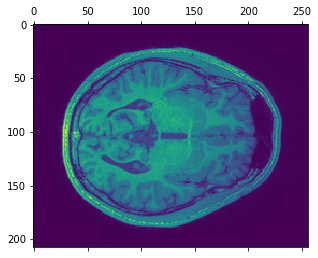

In [20]:
plt.matshow(data[:, :, data.shape[-1] // 2])